# Phenotypic Conservation in CPPN Crossover

In [173]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import numpy as np
import matplotlib.pyplot as plt
from neat import genome, config, indexer, nn
import cppn

In [175]:
indx = indexer.InnovationIndexer(0)
conf = config.Config('config.txt')

In [176]:
def express_cppn(genome, w, h):
    net = nn.create_feed_forward_phenotype(genome)
    grid = np.zeros((w, h))
    for x in range(w):
        for y in range(h):
            _x = -1.0 + 2.0 * x / (w - 1) # Map x, y to [-1, 1]
            _y = -1.0 + 2.0 * y / (h - 1)
            out = net.serial_activate([_x, _y])
            grid[x, y] = out[0]
    return grid

def three_image_plot(a, b, c):
    f, (ax0, ax1, ax2) = plt.subplots(1, 3)
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax0.imshow(a, cmap='gray', interpolation='nearest')
    ax1.imshow(b, cmap='gray', interpolation='nearest')
    ax2.imshow(c, cmap='gray', interpolation='nearest')

def show_crossover(mutations = 0):
    w = 16
    genome1 = genome.Genome.create_unconnected(0, conf)
    genome2 = genome.Genome.create_unconnected(1, conf)

    genome1.connect_full(indx)
    genome2.connect_full(indx)

    for _ in range(mutations):
        genome1.mutate(indx)
        genome2.mutate(indx)
    
    genome1.fitness = 1 # For assertions in crossover to pass.
    genome2.fitness = 0
    genome3 = genome1.crossover(genome2, child_id = 2)
    
    a = express_cppn(genome1, w, w)
    b = express_cppn(genome2, w, w)
    c = express_cppn(genome3, w, w)
    
    three_image_plot(a, b, c)

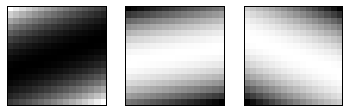

In [177]:
show_crossover()

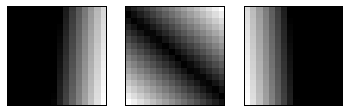

In [178]:
show_crossover()

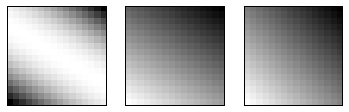

In [179]:
show_crossover()

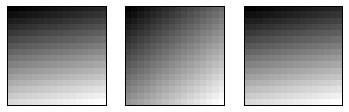

In [180]:
show_crossover()

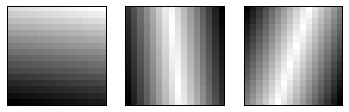

In [181]:
show_crossover()

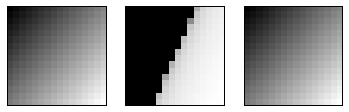

In [182]:
show_crossover()

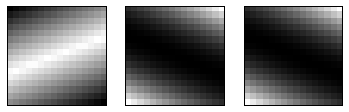

In [183]:
show_crossover()

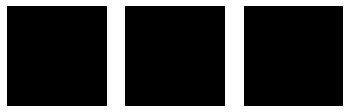

In [184]:
show_crossover(100)

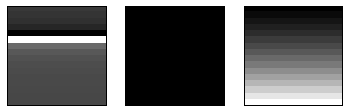

In [185]:
show_crossover(100)

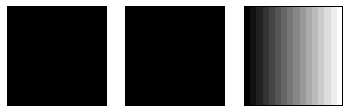

In [186]:
show_crossover(10)